### EMAIL SPAM FIlTERING

### 1. Import All Necessary Libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

### 2. Load the Dataset

In [5]:
data=pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 3. Data Cleaning

In [22]:
# All the values are categorical.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 5572
Number of columns: 5


Since most of the values in the last 3 columns are missing so we are going to remove it.

In [26]:
data.isnull().sum()/data.shape[0]*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [39]:
new_data=data[['v1','v2']]
new_data.rename(columns={"v1":"target","v2":"mail"},inplace=True)
new_data.head(5)

#We rename the column aaccording to our need.

C:\Users\SUMEET SAJJAN\AppData\Local\Temp\ipykernel_14440\1552264077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns={"v1":"target","v2":"mail"},inplace=True)


,target,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 4. EDA

In [ ]:
new_data['target'].value_counts()/new_data.shape[0]*100

ham     86.593683
spam    13.406317
Name: target, dtype: float64

ham: trusty mails 86.6%    
spam: untrusty mails 13.41%

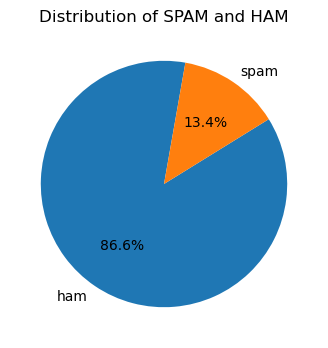

In [56]:
#Visualzing the target column.
category_counts=new_data['target'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(category_counts,labels=category_counts.index,autopct='%1.1f%%',startangle=80)
plt.title("Distribution of SPAM and HAM")
plt.show()

In [58]:
#Label Encoding
new_data.loc[new_data['target']=='spam','target',]=0
new_data.loc[new_data['target']=='ham','target',]=1

new_data.head(6)

C:\Users\SUMEET SAJJAN\AppData\Local\Temp\ipykernel_14440\3476419771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.loc[new_data['target']=='spam','target',]=0
C:\Users\SUMEET SAJJAN\AppData\Local\Temp\ipykernel_14440\3476419771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.loc[new_data['target']=='ham','target',]=1


,target,mail
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,0,FreeMsg Hey there darling it's been 3 week's n...


Done with target column.

In [67]:
# Splitting the dataset.
X_train,X_test,Y_train,y_test=train_test_split(new_data.mail,new_data.target,test_size=0.2,random_state=42)

In [69]:
# Mail data to feature vectors.

feature_vector=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
Xtrain_features=feature_vector.fit_transform(X_train)
Xtest_features=feature_vector.transform(X_test)

#convert y values as integer.
Y_train=Y_train.astype('int')
y_test=y_test.astype('int')

In [74]:
print(Xtest_features)

  (0, 7229)	0.2947064107791228
  (0, 6816)	0.4006242977875035
  (0, 4543)	0.38197308370768035
  (0, 3752)	0.1718556592061185
  (0, 3457)	0.3500886226408095
  (0, 3239)	0.34299776014114036
  (0, 2974)	0.34299776014114036
  (0, 2679)	0.3500886226408095
  (0, 1756)	0.31111329907426943
  (1, 6607)	0.27039238853977376
  (1, 6604)	0.19484478334547534
  (1, 5812)	0.22078293973996208
  (1, 5744)	0.35520030142077386
  (1, 5739)	0.35520030142077386
  (1, 5738)	0.25559165628741076
  (1, 5532)	0.33866381848750327
  (1, 4760)	0.29866169283344046
  (1, 3716)	0.3178303138520559
  (1, 2651)	0.3269309971271071
  (1, 1970)	0.2461378627103295
  (1, 1934)	0.22392171769600464
  (2, 5075)	0.4020147546075029
  (2, 4106)	0.5120683436791947
  (2, 3835)	0.4855870501823454
  (2, 2707)	0.4882288103453305
  :	:
  (1110, 4022)	0.191596066847086
  (1110, 3363)	0.3742235014841453
  (1110, 3174)	0.19113154928290435
  (1110, 2651)	0.3742235014841453
  (1110, 2148)	0.301483654608874
  (1110, 1869)	0.3876535449194833
  (

### 5. Model Training

### a. Import libraries

In [107]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

     -------------------------------------- 99.7/99.7 MB 466.5 kB/s eta 0:00:00


### b. Model Object

In [112]:
LRmodel=LogisticRegression()
RFmodel=RandomForestClassifier()
MNBmodel=MultinomialNB()
XGBmodel=xgb.XGBClassifier()

### c. Model Fitting

In [113]:
LRmodel.fit(Xtrain_features,Y_train)
RFmodel.fit(Xtrain_features,Y_train)
MNBmodel.fit(Xtrain_features,Y_train)
XGBmodel.fit(Xtrain_features,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
def model_prediction(model,X,Y):
    prediction_train=model.predict(X)
    return accuracy_score(Y,prediction_train)    

### i) Logistic Regression

In [94]:
print("Model Train Accuracy:",model_prediction(LRmodel,Xtrain_features,Y_train))
print("Model Test Accuracy:",model_prediction(LRmodel,Xtest_features,y_test))

Model Train Accuracy: 0.9694862014808167
Model Test Accuracy: 0.9524663677130045


### ii) Random Forest

In [101]:
print("Model Train Accuracy:",model_prediction(RFmodel,Xtrain_features,Y_train))
print("Model Test Accuracy:",model_prediction(RFmodel,Xtest_features,y_test))

Model Train Accuracy: 1.0
Model Test Accuracy: 0.97847533632287


### iii) MultiNominal Naive Bayes

In [105]:
print("Model Train Accuracy:",model_prediction(MNBmodel,Xtrain_features,Y_train))
print("Model Test Accuracy:",model_prediction(MNBmodel,Xtest_features,y_test))

Model Train Accuracy: 0.9838456360780794
Model Test Accuracy: 0.9668161434977578


### iv) XGBoost Classifier

In [114]:
print("Model Train Accuracy:",model_prediction(XGBmodel,Xtrain_features,Y_train))
print("Model Test Accuracy:",model_prediction(XGBmodel,Xtest_features,y_test))

Model Train Accuracy: 0.9921471842046219
Model Test Accuracy: 0.9713004484304932


Therefore, RandomForest giving us the highest result.

### 6. Prediction

In [125]:
def prediction(f_v,mail,model):
    input_feature_vectors=f_v.transform(mail)
    if(model.predict(input_feature_vectors)): print(f"{mail} is not a SPAM")
    else: print(f"{mail} is a SPAM ")

In [127]:
mail1=['Urgent your grandson was arrested last night in Mexico. Need bail money immediately.']
mail2=['Can you lend me some money']

prediction(feature_vector,mail1,RFmodel)
prediction(feature_vector,mail2,RFmodel)


['Urgent your grandson was arrested last night in Mexico. Need bail money immediately.'] is a SPAM 
['Can you lend me some money'] is not a SPAM


### Thank You